

```
Author ===> Jhanvi Shah
GitHub ===> @Jhanvi2001
Charotar University Of Science and Technology, CSPIT
Anand, Gujarat, India.
```



## **0. Libraries**

In [ ]:
# Libraries/Modules for Phase 1
import keras
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

# Library/Modules for phase 2
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# Libraries for phase 3
import numpy as np
import matplotlib.pyplot as plt

# Library/Module for phase 4
from keras.preprocessing import image

## **1. Loading Data**

In [ ]:
""" Providing training-testing directory path """

train_data_path = '/content/drive/MyDrive/BISAG Internship/Dataset/LivDet 2015/Digital_Persona/Training/' # training directory path
test_data_path = '/content/drive/MyDrive/BISAG Internship/Dataset/LivDet 2015/Digital_Persona/Testing/' # testing directory path

""" 
    assigning object of sequential class 
    here sequtial is model type imported from keras

"""

model = Sequential()


In [ ]:
""" 
    Rescaling data/images using ImageDataGenerator class.
    Loading all data/images in (128,128) size and in total 32 batches.
    Two categories: Live and Fake to classify input data/image.

"""

# rescaling and loading training data
train_data = ImageDataGenerator(rescale=1.0/255) 
train_set = train_data.flow_from_directory(directory=train_data_path, target_size=(128,128), batch_size=32, color_mode='rgb', class_mode='binary') 

# rescaling and loading testing data
test_data = ImageDataGenerator(rescale=1.0/255) # rescaling
test_set = test_data.flow_from_directory(directory=test_data_path, target_size=(128,128), batch_size=32, color_mode='rgb', class_mode='binary') 


Found 2010 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


## **2. Convolutional Neural Network**

In [ ]:
""" 1. First Layer """

model.add(Conv2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


In [ ]:
""" 2. Second Layer """

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


In [ ]:
""" 3. Flatten Layer """

model.add(Flatten())


In [ ]:
""" 4. Dense Layer """

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
""" Compiling the model """

# using Adam optimizer and getting performace metric based on accuracy as a parameter
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) 

# fitting data/images to model with total 30 epochs
model_history = model.fit(train_set, validation_data=test_set, epochs=30) 


## **3. Performance Analysis**

In [ ]:
plt.style.use('ggplot') # using ggplot (grammer of graphics) style to draw figures.
plt.figure

<function matplotlib.pyplot.figure>

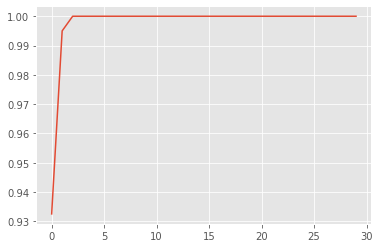

In [ ]:
""" 
    Drawing graph: Loss/Accuracy vs. Number of epochs
    < Training History >
"""

plt.plot(np.arange(0,30), model_history.history['accuracy'], label='train_acc')

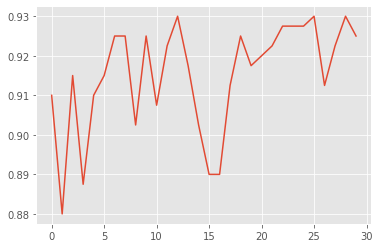

In [ ]:
""" 
    Drawing graph: Loss/Accuracy vs. Number of epochs
    < Validation/Testing History >
"""

plt.plot(np.arange(0,30), model_history.history['val_accuracy'], label='val_accuracy')

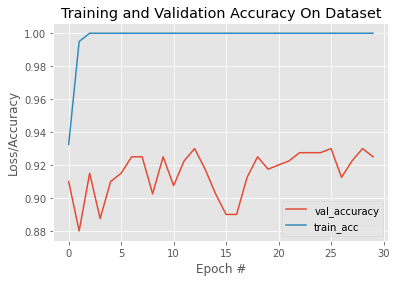

In [ ]:
""" 
    Drawing graph: Loss/Accuracy vs. Number of epochs
    < Training History + Validation/Testing History >
"""

plt.title('Training and Validation Accuracy On Dataset')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.plot(np.arange(0,30), model_history.history['val_accuracy'], label='val_accuracy') # validation/testing measures
plt.plot(np.arange(0,30), model_history.history['accuracy'], label='train_acc') # training measures
plt.legend(loc='lower right') # setting legend to lower right position

## **4. Testing Phase**

In [ ]:
""" loading test image with (128,128) dimension """

test_image_path = '/content/drive/MyDrive/BISAG Internship/Dataset/GitHub_Dataset/testing/Live/10_5.png'
test_image = image.load_img(test_image_path, target_size=(128,128)) # test image
test_image = image.img_to_array(test_image) # converting image to array
test_image = np.expand_dims(test_image, axis=0) # expanding shape of an array
result = model.predict(test_image) # giving test_image array to model for prediction
train_set.class_indices # checking class indices- Fake:0, Live:1

{'Fake': 0, 'Live': 1}

In [ ]:
""" finding test image category by comapring class indices """

if result[0][0]==1:
  prediction = 'Live'
else:
  prediction = 'Fake'

print('Input image category: ',prediction)